# R for physicists
## a short intro

## outline

* R: what is it for ?
* R: base syntax
* R: the packages you need to know/learn to be efficient
* Demos on physicists data
* The pitfalls to avoid
* how to learn and where to look

R is created in 1995

An open source implementation of S (Bell labs statistical software)



Designed to make data analysis and statistics easy



interpreted language, high level

Primarily used in academics, moving to enterprise lately

# Pros

* open source, so free

* Wonderful IDE: Rstudio
  * variable exploration
  * help, plot tools
  * github integrated




![Rstudio.PNG](Rstudio.PNG)

* huge community! so lot of helps

![stack_R_community.PNG](stack_R_community.PNG)

* Lots of tools (libraries)

![number-of-submitted-packages-to-CRAN.png](number-of-submitted-packages-to-CRAN.png)

* easy to paralelize, can be used on baobab

![baobab.PNG](baobab.PNG)

# Cons

* Slow (not for Whab or Nico, but some library are coded in C)



* lots of ways to do the same things, so a bit messy in the beginning
* hard to find the appropriates tools in the beginning (but i ll give you the good ones)


* steep learning curve, but accesible for experienced programmers or physicists

# Basic syntax

When you install R, it comes with **base** package and 6 others.

R is interpreted, and guess the type you declare (like matlab and python)

In [6]:
a <- 2
b = 2
a
b

[1] 2

[1] 2

## data type

In [247]:
a <- "plouf"
class(a)

[1] "character"

In [248]:
b <- 2
class(b)

[1] "numeric"

In [249]:
c <- 2L
class(c)

[1] "integer"

In [250]:
d <- as.factor("plouf")
class(d)

[1] "factor"

WTF factor ?

In [251]:
a
d
as.numeric(a)
as.numeric(d)

[1] "plouf"

[1] plouf
Levels: plouf

Warning message in eval(expr, envir, enclos):
"NAs introduits lors de la conversion automatique"

[1] NA

[1] 1

used in statistical model (generalised linear models, etc), but dangerous

## data structure type

### vector

In [41]:
# vector
a <- c(2,5,7,8)
a
class(a)

[1] 2 5 7 8

[1] "numeric"

In [42]:
a[1]

[1] 2

In [43]:
a[1:2]

[1] 2 5

In [48]:
a[1,4]

ERROR: Error in a[1, 4]: nombre de dimensions incorrect


In [49]:
a[c(1,4)]

[1] 2 8

everything same class, so coerce things

In [30]:
a <- c(2,5,7,"plouf")
class(a)
a[1]

[1] "character"

[1] "2"

### matrix

In [36]:
b <- matrix(c(3,4,5,8),nrow = 2, ncol = 2)
b

[,1] [,2]
[1,] 3    5   
[2,] 4    8

In [37]:
b[1,]

[1] 3 5

In [38]:
b[,2]

[1] 5 8

In [39]:
b[1]

[1] 3

all matrix operation exists, equation solving etc.

### list

In [50]:
c <- list(trucs = c(1,5,7), plouf = "des choses", matrice = matrix(sample(1:100,25),5,5) )
c

$trucs
[1] 1 5 7

$plouf
[1] "des choses"

$matrice
     [,1] [,2] [,3] [,4] [,5]
[1,]   63   31   28   78   29
[2,]   44   57   46   38   34
[3,]   76   84   95   51   83
[4,]   17   15   36   25   66
[5,]   12   81  100   69   70

In [56]:
c$trucs
c[[1]]
c[["trucs"]]
c["trucs"]

[1] 1 5 7

[1] 1 5 7

[1] 1 5 7

$trucs
[1] 1 5 7

### data frame: une liste avec contrainte de dimension ! 

C'est le ** coeur du traitement de données** dans R

In [287]:
d <- data.frame(experiment = rep(LETTERS[1:5], each = 2), data1 = sample(c(0,1),10,replace = T), data2 = sample(1:100,10))
d

experiment data1 data2
1  A          1     98   
2  A          1     22   
3  B          0     87   
4  B          1     85   
5  C          1     52   
6  C          1     72   
7  D          0     84   
8  D          1     38   
9  E          0     75   
10 E          1     16

In [288]:
#idem list:
d$experiment
d[,"experiment"]

[1] A A B B C C D D E E
Levels: A B C D E

[1] A A B B C C D D E E
Levels: A B C D E

In [289]:
d$experiment[1]
d[1,"experiment"]
d[1,1]

[1] A
Levels: A B C D E

[1] A
Levels: A B C D E

[1] A
Levels: A B C D E

Esay to subset using boolean.

In [290]:
d$experiment
d$experiment == "A"

[1] A A B B C C D D E E
Levels: A B C D E

[1]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [293]:
d[d$experiment == "A",]


experiment data1 data2
1 A          1     98   
2 A          1     22

## loops and conditional

In [294]:
d[d$data2 > 50 & d$data1 == 0,]

experiment data1 data2
3 B          0     87   
7 D          0     84   
9 E          0     75

In [295]:
d[d$data2 > 50 | d$data1 == 0,]

experiment data1 data2
1 A          1     98   
3 B          0     87   
4 B          1     85   
5 C          1     52   
6 C          1     72   
7 D          0     84   
9 E          0     75

In [84]:
for(i in 1:4){
    if(i>2){
        print(paste0(i," est sup à 2" ))}else{
        print(paste0(i," est inf à 2" ))}
}

[1] "1 est inf à 2"
[1] "2 est inf à 2"
[1] "3 est sup à 2"
[1] "4 est sup à 2"


Specific of R, really usefull: lapply and sapply (and others)

In [116]:
plouf <- lapply(1:4,function(x){x^2})
plouf
class(plouf)

plouf2 <- sapply(1:4,function(x){x^2})
plouf2
class(plouf2)

[[1]]
[1] 1

[[2]]
[1] 4

[[3]]
[1] 9

[[4]]
[1] 16

[1] "list"

[1]  1  4  9 16

[1] "numeric"

In [101]:
sapply(c("data1","data2"),function(col){
    summary(d[,col])
})

data1 data2
Min.    0.0    5.00
1st Qu. 0.0   21.25
Median  0.0   47.50
Mean    0.4   46.60
3rd Qu. 1.0   59.25
Max.    1.0   95.00

# Libraries

In [117]:
library(ggplot2) # pour les graphiques

In [119]:
head(mpg)

manufacturer model displ year cyl trans      drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact
6 audi         a4    2.8   1999 6   manual(m5) f   18  26  p  compact

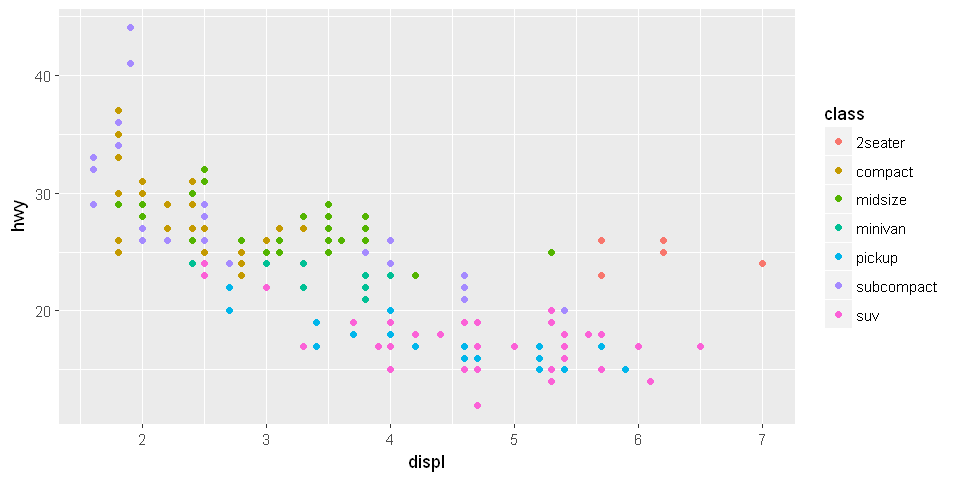

In [296]:
ggplot(data = mpg) + 
  geom_point(aes(x = displ, y = hwy, color = class))

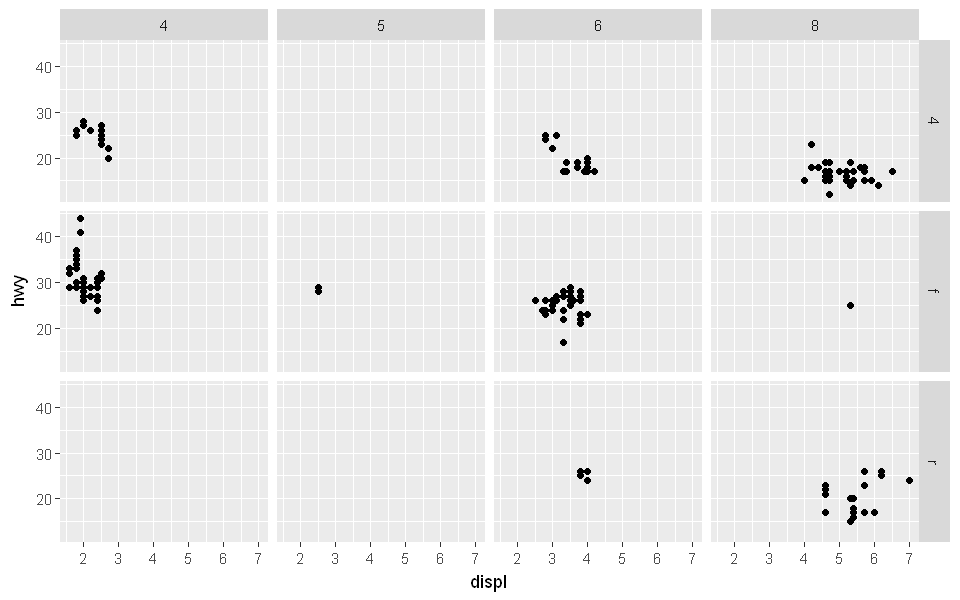

In [245]:
ggplot(data = mpg) + 
  geom_point(aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

In [135]:
library(data.table) # pour le data management
dt <- setDT(copy(mpg))
class(dt)

[1] "data.table" "data.frame"

In [130]:
plus <- data.table(manufacturer = c('audi','chevrolet','dodge','ford','honda','hyundai','jeep','land rover','lincoln','mercury','nissan','pontiac','subaru','toyota','volkswagen'),
                   country = c("DE","US","US","US","JP","JP","US","UK","UK","US","JP","US","DE","JP","DE"))
head(plus)

manufacturer country
1 audi         DE     
2 chevrolet    US     
3 dodge        US     
4 ford         US     
5 honda        JP     
6 hyundai      JP

In [132]:
merged <- merge(dt,plus,on = "manufacturer")
head(merged)

manufacturer model displ year cyl trans      drv cty hwy fl class   country
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact DE     
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact DE     
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact DE     
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact DE     
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact DE     
6 audi         a4    2.8   1999 6   manual(m5) f   18  26  p  compact DE

In [134]:
merged[country == "DE",.(mean_comsum = mean(hwy)),by = .(manufacturer,model)]

manufacturer model        mean_comsum
1 audi         a4           28.28571   
2 audi         a4 quattro   25.75000   
3 audi         a6 quattro   24.00000   
4 subaru       forester awd 25.00000   
5 subaru       impreza awd  26.00000   
6 volkswagen   gti          27.40000   
7 volkswagen   jetta        29.11111   
8 volkswagen   new beetle   32.83333   
9 volkswagen   passat       27.57143

You would have made a double loop with condition. With 10 000 000 rows, 100000 groups you can't. Here it is efficient and concise.
Alternative : 

In [ ]:
library(dplyr) # more or less equal perf

In [136]:
library(stringr) # to deal efficiently with strings

In [144]:
dose <- c("20 g/kg", "30g/kg lkd","15000 mg/kg")
dose

[1] "20 g/kg"     "30g/kg lkd"  "15000 mg/kg"

In [145]:
dose_corr <- data.frame( unit1 = str_extract(dose,"[a-z]+(?=/)"), 
                  unit2 = str_extract(dose,"(?<=/)[a-z]+"),
                  value = str_extract(dose,"[0-9]+"))
dose_corr

unit1 unit2 value
1 g     kg    20   
2 g     kg    30   
3 mg    kg    15000

In [185]:
library(lmerTest) 
library(lme4)

regressions linéaires, non linéaires, multiniveau, lineaire généralisé etc

In [269]:
a1_mean = 3
b1_mean = 0
curves <- data.table( curve = rep(letters[1:5],each = 10),
                     time = rep(1:10,5),
                     a1 = rep(rnorm(5,a1_mean,1),each = 10), 
                     b1 = rep(rnorm(5,b1_mean,1),each = 10))

curves[, y_data := a1*time + b1 + rnorm(.N,0,2), by = curve]
curves[, y_real := a1*time + b1 , by = curve]


Create 5 curves with slope normaly distrib around a1_mean and intercept around b1_mean, with a bit of noise.

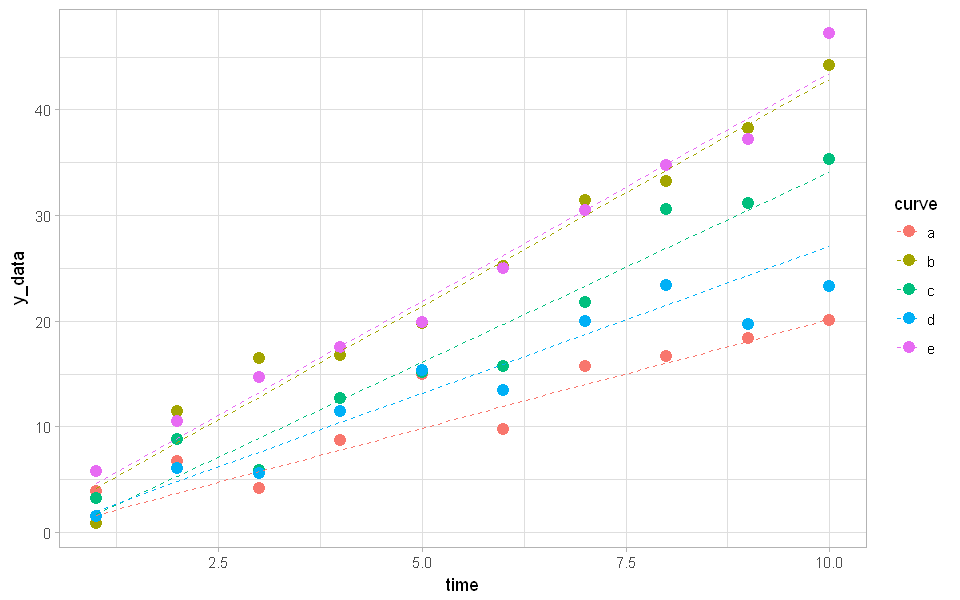

In [298]:
p <- ggplot(data = curves )+
geom_point(aes(time,y_data,color = curve),size = 3)+
geom_line(aes(time,y_real,color= curve),linetype = "dashed")+
theme_light()
p

In [271]:
fit <- lmer(y_data ~ time + (1 + time|curve) , data = curves)
summary(fit)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: y_data ~ time + (1 + time | curve)
   Data: curves

REML criterion at convergence: 242

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.96349 -0.76208 -0.08607  0.71772  1.87458 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 curve    (Intercept) 0.1645   0.4055        
          time        1.1770   1.0849   -1.00
 Residual             5.1073   2.2599        
Number of obs: 50, groups:  curve, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)   
(Intercept)   0.2499     0.7138 19.4780   0.350  0.73002   
time          3.2979     0.4978  4.0060   6.625  0.00268 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
     (Intr)
time -0.439

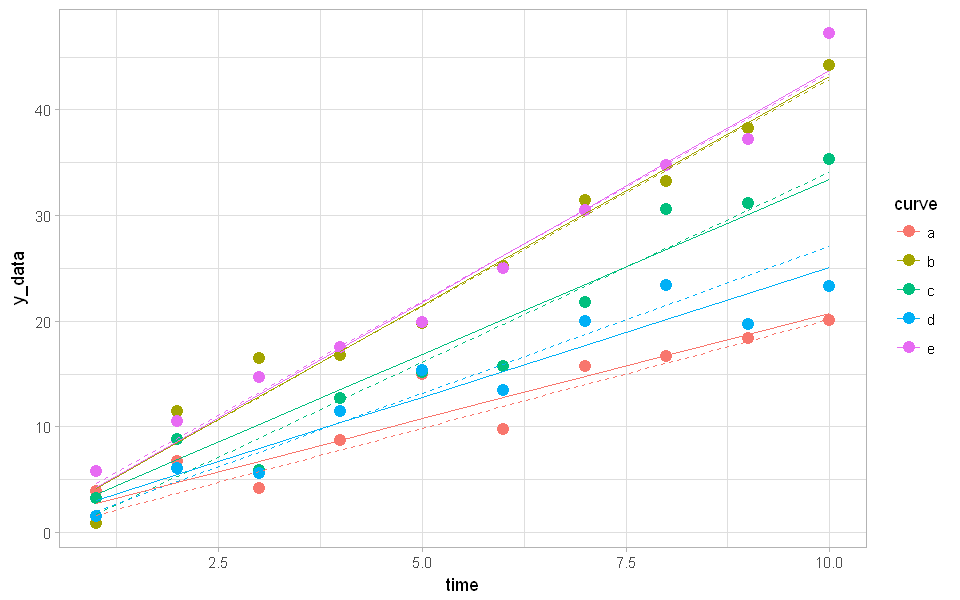

In [299]:
curves[,y_fit := predict(fit, newdata = curves)]

p + geom_line(aes(time,y_fit,color= curve),linetype = "solid")

## Some others

* ** librudate** for date handling
* **rshiny** to generate java/html interactives pages with buttons and graphs (amazing)
* ** reporters ** to generate table directly in word
* ** parallel ** to do parallel calculation


## now real physicist examples:

* ** the join experiment I did with PSI ** in 2014. 
* one hour in R , weeks during my post doc and matlab.

The experiment:
![PSI_setup.PNG](PSI_setup.PNG)

three main devices : 
* arduino, say if laser is on or off
* grimm for particles sizes
* AMS, for composition (and size)

In [3]:
library(ggplot2)
library(data.table)
library(stringr)
library(lubridate)
setwd("C:/Users/dmongin/Documents/presentation_R_pourlesnuls/PSI")
list.files(pattern =  ".txt$")

[1] "arduino_tot.txt"    "grimm_tot.txt"      "grimm_tot_M.txt"   
[4] "testo_tot.txt"      "timeserie_ams4.txt"

In [4]:
arduino <- fread("arduino_tot.txt")
head(arduino)

V1   V2 V3 V4 V5 V6 V7    V8   V9   V10
1 2014 6  17 16 59 28 61168 0.00 45.6 0  
2 2014 6  17 16 59 28 61168 0.00 45.6 0  
3 2014 6  17 16 59 28 61168 0.00 45.6 0  
4 2014 6  17 16 59 28 61168 0.00 45.6 0  
5 2014 6  17 16 59 28 61168 0.00 45.6 0  
6 2014 6  17 16 59 28 61168 0.35 45.6 0

Here a stupid person didn't put any name (and its me), and didn't use any formating for the date. Here is the date formating

In [7]:
arduino[,Date := ymd_hms(paste0(V1,".",V2,".",V3," ",V4,":",V5,":",V6))] # make a string with all year month day and HMS
head(arduino)

V1   V2 V3 V4 V5 V6 V7    V8   V9   V10 Date               
1 2014 6  17 16 59 28 61168 0.00 45.6 0   2014-06-17 16:59:28
2 2014 6  17 16 59 28 61168 0.00 45.6 0   2014-06-17 16:59:28
3 2014 6  17 16 59 28 61168 0.00 45.6 0   2014-06-17 16:59:28
4 2014 6  17 16 59 28 61168 0.00 45.6 0   2014-06-17 16:59:28
5 2014 6  17 16 59 28 61168 0.00 45.6 0   2014-06-17 16:59:28
6 2014 6  17 16 59 28 61168 0.35 45.6 0   2014-06-17 16:59:28

In [5]:
arduino[,laser := V10]
arduino[,ozone := V9]
table(arduino[,.N,by = Date]$N) # table of line number per date (i.e. per second)


    1     2     3     8    11    29    45 
86003   165     1     1     2     1     1 

Multiple lines with the same exact date !! Only one measure per second and variable of interest:

In [8]:
arduino[,N := .N,by = Date] # N is the number of line per Date
arduino_clean <- arduino[N == 1,.(Date,laser,ozone)] # subselection
head(arduino_clean)

Date                laser ozone
1 2014-06-17 16:59:29 0     49.2 
2 2014-06-17 16:59:30 0     49.2 
3 2014-06-17 16:59:31 0     49.2 
4 2014-06-17 16:59:32 0     49.2 
5 2014-06-17 16:59:33 0     49.2 
6 2014-06-17 16:59:34 0     49.2

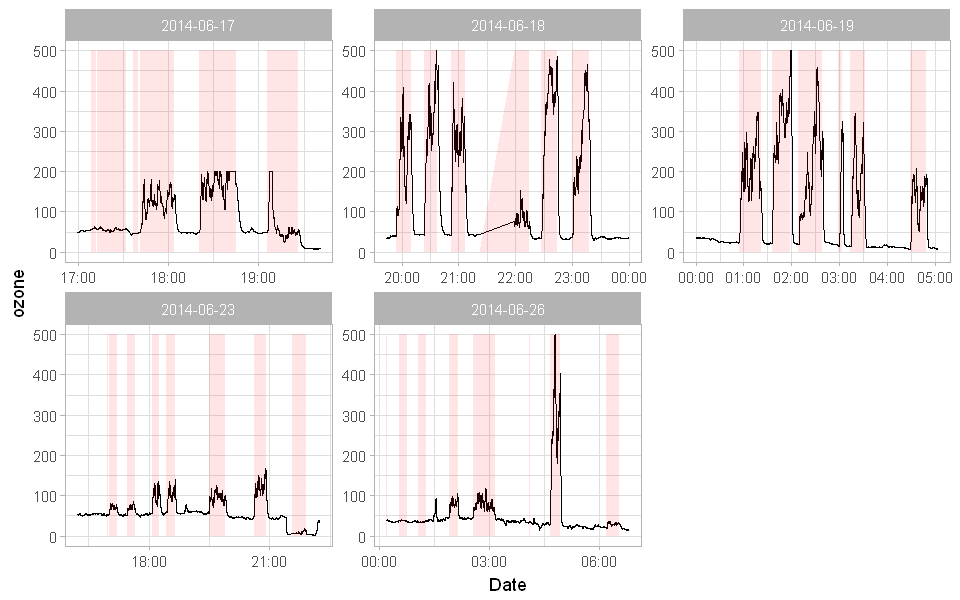

In [12]:
ggplot(data = arduino_clean,aes(Date,ozone))+ # define data, x and y
  geom_line()+ # curve type
  geom_ribbon(aes(Date,ymin = 0,ymax = laser*500),fill = "red", alpha = 0.1)+ # make area trasparent
  theme_light()+ # choose theme
  facet_wrap(~date(Date),scales = "free") # one plot per day

In [13]:
testo <- fread("testo_tot.txt") # read
testo[,Date := ymd_hms(paste0(V1,".",V2,".",V3," ",V4,":",V5,":",V6))]# define the date
testo[,temp := V9] # define temp column
testo[,humidity := V8]
testo_clean <- testo[,.(Date,temp,humidity)] # subselect the columns of interest
head(testo_clean)

Date                temp   humidity
1 2014-06-17 16:59:35 24.802 40.739  
2 2014-06-17 16:59:40 24.840 38.029  
3 2014-06-17 16:59:45 24.819 38.965  
4 2014-06-17 16:59:50 24.271 40.590  
5 2014-06-17 16:59:55 24.440 40.947  
6 2014-06-17 17:00:00 24.594 41.591

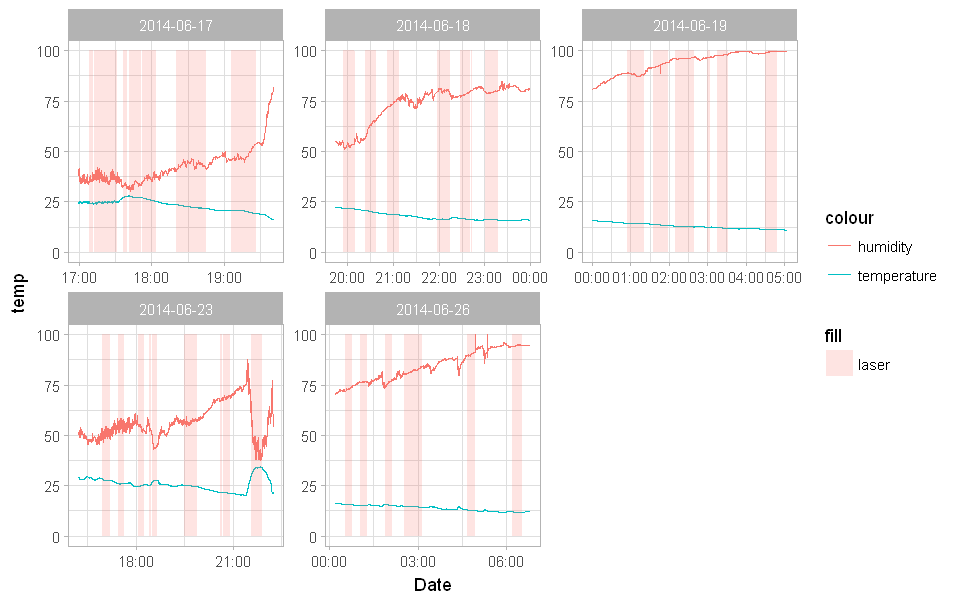

In [14]:
plouf <- merge(testo,arduino_clean,all.x = T,on = "Date") # merge arduino and testo
ggplot(data = plouf)+ # plot
  geom_line(aes(Date,temp,color = "temperature"))+ 
  geom_line(aes(Date,humidity,color = "humidity"))+
  geom_ribbon(aes(Date,ymin = 0,ymax = laser*100,fill = "laser"), alpha = 0.2)+
  theme_light()+  facet_wrap(~date(Date),scales = "free")

In [15]:
summary(lm(ozone ~ laser + humidity,data = plouf))


Call:
lm(formula = ozone ~ laser + humidity, data = plouf)

Residuals:
    Min      1Q  Median      3Q     Max 
-103.64  -23.30   -4.18   13.89  456.08 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.18843    1.09169   26.74   <2e-16 ***
laser       67.01037    0.52723  127.10   <2e-16 ***
humidity     0.15619    0.01437   10.87   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 56.69 on 53319 degrees of freedom
  (700 observations deleted due to missingness)
Multiple R-squared:  0.2326,	Adjusted R-squared:  0.2326 
F-statistic:  8080 on 2 and 53319 DF,  p-value: < 2.2e-16


In [16]:
summary(lm(humidity ~ laser + temp,data = plouf))


Call:
lm(formula = humidity ~ laser + temp, data = plouf)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3458  -2.7637   0.3438   3.4444  27.4333 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 121.593124   0.085689 1419.00   <2e-16 ***
laser        -1.377861   0.056112  -24.56   <2e-16 ***
temp         -2.575838   0.004224 -609.87   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.051 on 53319 degrees of freedom
  (700 observations deleted due to missingness)
Multiple R-squared:  0.876,	Adjusted R-squared:  0.876 
F-statistic: 1.883e+05 on 2 and 53319 DF,  p-value: < 2.2e-16


In [47]:
grim <- fread("grimm_tot.txt") # read file
setnames(grim,"[d&t31.12.2035 11:50:55]","date") # change weird name
grim[,Date := dmy_hms(date)] # make date
grim[,N := .N,by = Date] # count the number of line per date
grim <- grim[N == 1] # select just one line per s
head(grim)

date                Counts-1320 [1/l] Diameter-1320 [nm] 0.265 µm 0.290 µm
1 17.06.2014 17:01:10 100               0                  2075      700    
2 17.06.2014 17:01:30 100               0                  2325     1175    
3 17.06.2014 17:01:40 100               0                  2650     1000    
4 17.06.2014 17:01:50 100               0                  2025     1075    
5 17.06.2014 17:02:10 100               0                  2000     1350    
6 17.06.2014 17:02:20 100               0                  2375     1425    
  0.325 µm 0.375 µm 0.425 µm 0.475 µm 0.540 µm ... 11.250 µm 13.750 µm
1 325      275       50       0        0       ... 0         0        
2 800      325      100      50       25       ... 0         0        
3 675      350        0       0        0       ... 0         0        
4 625      400      150      25        0       ... 0         0        
5 675      300      100       0       25       ... 0         0        
6 425      375      250       0       25       ... 0         0        
  16.250 µm 18.750 µm 22.500 µm 27.500 µm 31.000 µm 34.000 µm
1 0         0         0         0         0         0        
2 0         0         0         0         0         0        
3 0         0         0         0         0         0        
4 0         0         0         0         0         0        
5 0         0         0         0         0         0        
6 0         0         0         0         0         0        
  Date                N
1 2014-06-17 17:01:10 1
2 2014-06-17 17:01:30 1
3 2014-06-17 17:01:40 1
4 2014-06-17 17:01:50 1
5 2014-06-17 17:02:10 1
6 2014-06-17 17:02:20 1

I switch to long format instead of broad:

In [48]:
grim_clean <- melt(grim,measure.vars = patterns("m$"),variable.name = "size",value.name = "concentration")
head(grim_clean)

date                Counts-1320 [1/l] Diameter-1320 [nm] Date               
1 17.06.2014 17:01:10 100               0                  2014-06-17 17:01:10
2 17.06.2014 17:01:30 100               0                  2014-06-17 17:01:30
3 17.06.2014 17:01:40 100               0                  2014-06-17 17:01:40
4 17.06.2014 17:01:50 100               0                  2014-06-17 17:01:50
5 17.06.2014 17:02:10 100               0                  2014-06-17 17:02:10
6 17.06.2014 17:02:20 100               0                  2014-06-17 17:02:20
  N size     concentration
1 1 0.265 µm 2075         
2 1 0.265 µm 2325         
3 1 0.265 µm 2650         
4 1 0.265 µm 2025         
5 1 0.265 µm 2000         
6 1 0.265 µm 2375

I change the size to numbers

In [49]:
grim_clean[,size := as.numeric(str_extract(size,"[0-9]+\\.[0-9]+"))] # extract just numbers of size
grim_clean <- grim_clean[,.(Date,size,concentration)]
head(grim_clean)

Date                size  concentration
1 2014-06-17 17:01:10 0.265 2075         
2 2014-06-17 17:01:30 0.265 2325         
3 2014-06-17 17:01:40 0.265 2650         
4 2014-06-17 17:01:50 0.265 2025         
5 2014-06-17 17:02:10 0.265 2000         
6 2014-06-17 17:02:20 0.265 2375

Example : plot the mean concentration per hour, for each day of the experiment:


In [50]:
moy_grim <- grim_clean[,.(concentration_m = mean(concentration)),by = .(size,hour(Date),date(Date))]
head(moy_grim)

size  hour date       concentration_m
1 0.265 17   2014-06-17 43433.83       
2 0.265 18   2014-06-17 28027.25       
3 0.265 19   2014-06-17 20778.73       
4 0.265 17   2014-06-18 69960.71       
5 0.265 18   2014-06-18 68438.87       
6 0.265 19   2014-06-18 74782.11

Warning message:
"Transformation introduced infinite values in continuous y-axis"

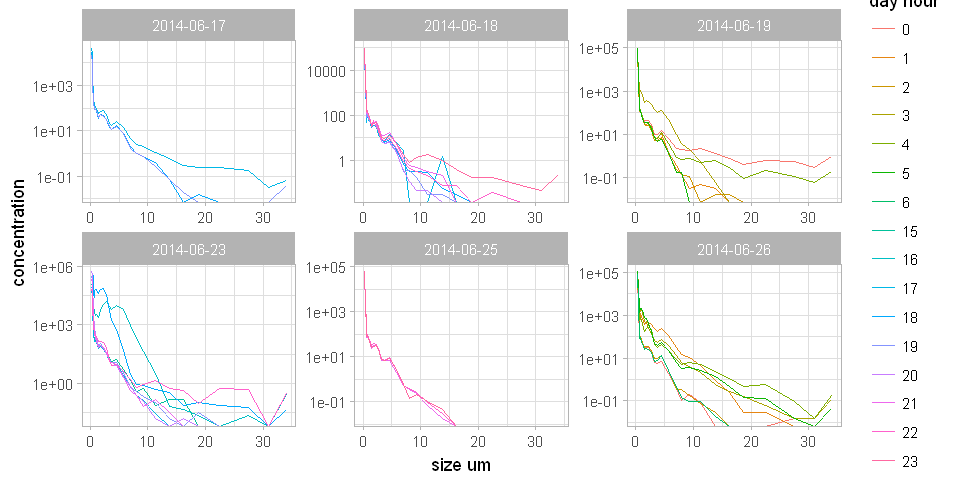

In [56]:
ggplot(data = moy_grim,aes(as.numeric(size),concentration_m))+
  geom_line(aes(color = as.factor(hour),group = hour))+
  facet_wrap(~date,scales = "free")+ theme_light() +
  scale_y_log10() +
  labs(x = "size um", y = "concentration", color = "day hour")

In [24]:
AMS <- fread("timeserie_ams4.txt")
AMS[,Date := dmy_hms(time_stamp)]
head(AMS)

time_stamp           Tot     Org     SO4     NO3      NH4      Chl        
1 18:06:2014  22:17:49 6.81623 3.75423 1.33178 0.798375 0.931821 1.45099e-05
2 18:06:2014  22:18:10 6.36363 3.51243 1.27318 0.726966 0.845720 5.33109e-03
3 18:06:2014  22:18:31 6.18041 3.29982 1.34318 0.761861 0.769005 6.54514e-03
4 18:06:2014  22:18:53 6.38510 3.49896 1.34846 0.704156 0.824175 9.34887e-03
5 18:06:2014  22:19:14 6.45665 3.50046 1.39680 0.696631 0.857673 5.08134e-03
6 18:06:2014  22:19:35 5.71712 3.15600 1.19864 0.570948 0.779798 1.17294e-02
  Org43    Org44    Date               
1 0.310066 0.651729 2014-06-18 22:17:49
2 0.302963 0.617536 2014-06-18 22:18:10
3 0.277555 0.589916 2014-06-18 22:18:31
4 0.283127 0.606004 2014-06-18 22:18:53
5 0.300025 0.637838 2014-06-18 22:19:14
6 0.281378 0.546123 2014-06-18 22:19:35

define three experiment (dont remember):

In [25]:
# define 3 experiment with the dates
exp1 <- ymd(c("2014-06-17","2014-06-18","2014-06-19"))
exp2 <- ymd(c("2014-06-23"))
exp3 <- ymd(c("2014-06-25","2014-06-26"))

# for the date in each group, define new variable exp
grim_clean[date(Date) %in% exp1,exp := "exp1"]
grim_clean[date(Date) %in% exp2,exp := "exp2"]
grim_clean[date(Date) %in% exp3,exp := "exp3"]

AMS[date(Date) %in% exp1,exp := "exp1"]
AMS[date(Date) %in% exp2,exp := "exp2"]
AMS[date(Date) %in% exp3,exp := "exp3"]

I merge arduino results and AMS to have the laser

In [26]:
plouf <- merge(arduino_clean,AMS,all.y = T,by = "Date")
plouf <- plouf[!is.na(laser)]
head(plouf)

Date                laser ozone time_stamp           Tot     Org     SO4    
1 2014-06-18 22:17:49 0     35    18:06:2014  22:17:49 6.81623 3.75423 1.33178
2 2014-06-18 22:18:10 0     34    18:06:2014  22:18:10 6.36363 3.51243 1.27318
3 2014-06-18 22:18:31 0     33    18:06:2014  22:18:31 6.18041 3.29982 1.34318
4 2014-06-18 22:18:53 0     33    18:06:2014  22:18:53 6.38510 3.49896 1.34846
5 2014-06-18 22:19:14 0     33    18:06:2014  22:19:14 6.45665 3.50046 1.39680
6 2014-06-18 22:19:35 0     33    18:06:2014  22:19:35 5.71712 3.15600 1.19864
  NO3      NH4      Chl         Org43    Org44    exp 
1 0.798375 0.931821 1.45099e-05 0.310066 0.651729 exp1
2 0.726966 0.845720 5.33109e-03 0.302963 0.617536 exp1
3 0.761861 0.769005 6.54514e-03 0.277555 0.589916 exp1
4 0.704156 0.824175 9.34887e-03 0.283127 0.606004 exp1
5 0.696631 0.857673 5.08134e-03 0.300025 0.637838 exp1
6 0.570948 0.779798 1.17294e-02 0.281378 0.546123 exp1

change to long format

In [27]:
AMS_long <- melt(plouf,measure.vars = c("Tot","Org","SO4","NO3","NH4","Chl","Org43","Org44"),value.name = "concentration",variable.name = "type")
head(AMS_long)


Date                laser ozone time_stamp           exp  type concentration
1 2014-06-18 22:17:49 0     35    18:06:2014  22:17:49 exp1 Tot  6.81623      
2 2014-06-18 22:18:10 0     34    18:06:2014  22:18:10 exp1 Tot  6.36363      
3 2014-06-18 22:18:31 0     33    18:06:2014  22:18:31 exp1 Tot  6.18041      
4 2014-06-18 22:18:53 0     33    18:06:2014  22:18:53 exp1 Tot  6.38510      
5 2014-06-18 22:19:14 0     33    18:06:2014  22:19:14 exp1 Tot  6.45665      
6 2014-06-18 22:19:35 0     33    18:06:2014  22:19:35 exp1 Tot  5.71712

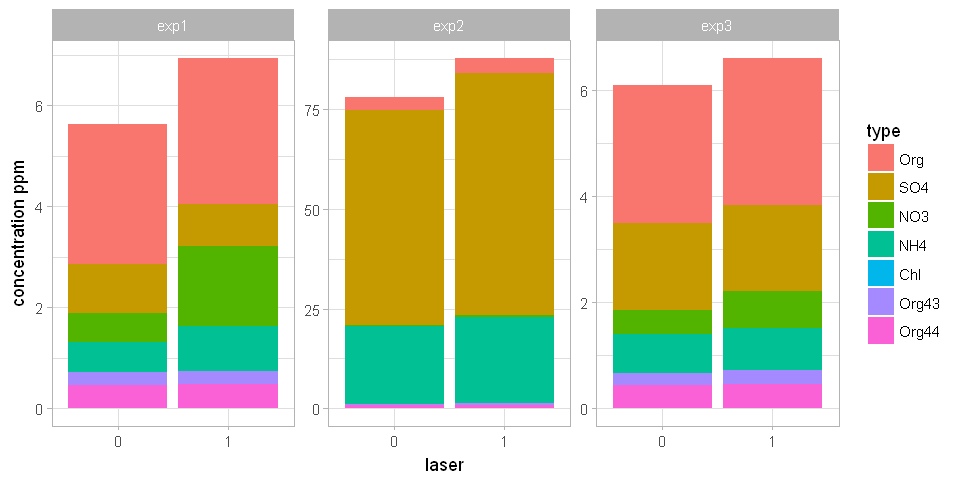

In [37]:
# calculate the mean per aerosol type, laser state and experiment
result_AMS <- AMS_long[type != "Tot",.(concentration_m = mean(concentration)),by = .(laser,type,exp)]
# do the plot
ggplot(data = result_AMS,aes( as.factor(laser) ,concentration_m,fill = type))+
  geom_col()+
  facet_wrap(~ exp, scales = "free")+
  labs( x = "laser", y = "concentration ppm", color = "type", fill = "type" ) + theme_light()

To visualize the time serie in time: not complicated either

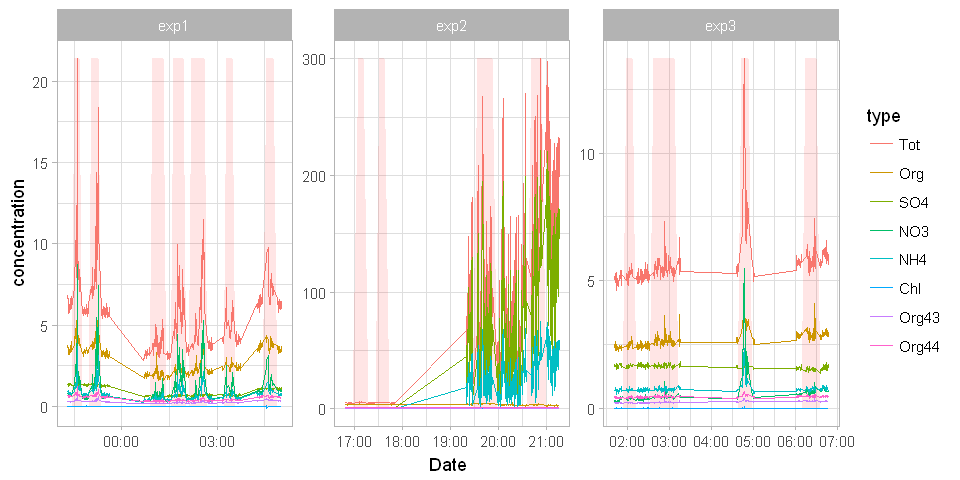

In [285]:
ggplot(data = AMS_long[,laser_n := laser*max(concentration),by = exp],aes(Date,concentration))+
  geom_ribbon(aes(Date,ymin = 0,ymax = laser_n),fill = "red", alpha = 0.1)+
  geom_line(aes(colour = type))+ facet_wrap(~exp,scales = "free")+ theme_light()


# Pitfalls

don't re-descover, use the libraries

use long format, grouping operation, and ggplot to make your life easy.
* Long format : each column a variable. 
* Example grimm: All columns are particles concentration -> two columns, one concentration, the other size

spending time on data management makes life easier after. So:
* check if your unique values are unique
* always look out for missing values
* define the column type when importing data: make numeric variable numeric, avoid factors

# Ressources

* http://r4ds.had.co.nz/ : R for Data science. Author is head of Rstudio, inventor of ggplot, dplyr, libridate, Rshiny etc. Ressource free online.
* stackoverflow ! Carefull:
    * Check if the question is already asked
    * Give a reproducible small example of your problem, so people can give solution(s)
    * Be specific, show that you tried something
    * If so, 20 minutes to have an answer max
* Rlunchs at unige ! http://use-r-carlvogt.github.io/prochains-lunchs/


# Want more (I have more)?
# Questions ?
# Want to see my Schlieren experiment ?

# Proof of warming in geneva in 20 lines of R

In [313]:
setwd("C:/Users/dmongin/Documents/presentation_R_pourlesnuls")
Geneva <- read.csv("test.txt",sep = ";",skip = 27)
head(Geneva)
Geneva <- setDT(Geneva)

Year Month Temperature Precipitation
1 1864 1     -4.2         13.6        
2 1864 2     -0.7         17.2        
3 1864 3      5.3         32.7        
4 1864 4      8.3         35.2        
5 1864 5     13.5         68.9        
6 1864 6     15.6        115.2

In [314]:
Geneva[,dec := Year %/% 10]
Geneva[,Temperature_dec := mean(Temperature),by = .(dec,Month)]

ggplot(data = Geneva,aes(Month,Temperature_dec))+
  geom_line(aes(color = as.factor(dec*10)))+
  theme_light()+
  labs(  color = "decennie", title = "mean per decennie",  y = "Temperature",   x = "Months"  )
options(repr.plot.width=8, repr.plot.height=4.5)

In [315]:
library(zoo)

nyear <- 5
Geneva[,Temperature_rollmean := c(rollmean(Temperature,nyear,align = "center",fill = NA)), by = Month]
fit <- lmer(Temperature ~ I(Year/100) + (1+I(Year/100)|Month),data = Geneva)
Geneva[,Temperature_predict := predict(fit,newdata = Geneva)]
summary(fit)


Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: Temperature ~ I(Year/100) + (1 + I(Year/100) | Month)
   Data: Geneva

REML criterion at convergence: 7166

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5947 -0.6501  0.0148  0.6508  3.6801 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 Month    (Intercept) 89.59250 9.465         
          I(Year/100)  0.02251 0.150    -0.94
 Residual              2.65071 1.628         
Number of obs: 1855, groups:  Month, 12

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) -15.96749    3.18911  11.02700  -5.007 0.000395 ***
I(Year/100)   1.31851    0.09514  11.01000  13.858 2.59e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
I(Year/100) -0.824

In [316]:
ggplot(data = Geneva)+
  geom_point(aes(Year,Temperature_rollmean,color = as.factor(Month)))+
  geom_line(aes(Year,Temperature_predict,color = as.factor(Month)))+
  theme_light()+
  labs(   color = "Month",  title = "Evolution",   y = "Temperature",    x = "Year"  )

Warning message:
"Removed 48 rows containing missing values (geom_point)."

# calculation of gradient

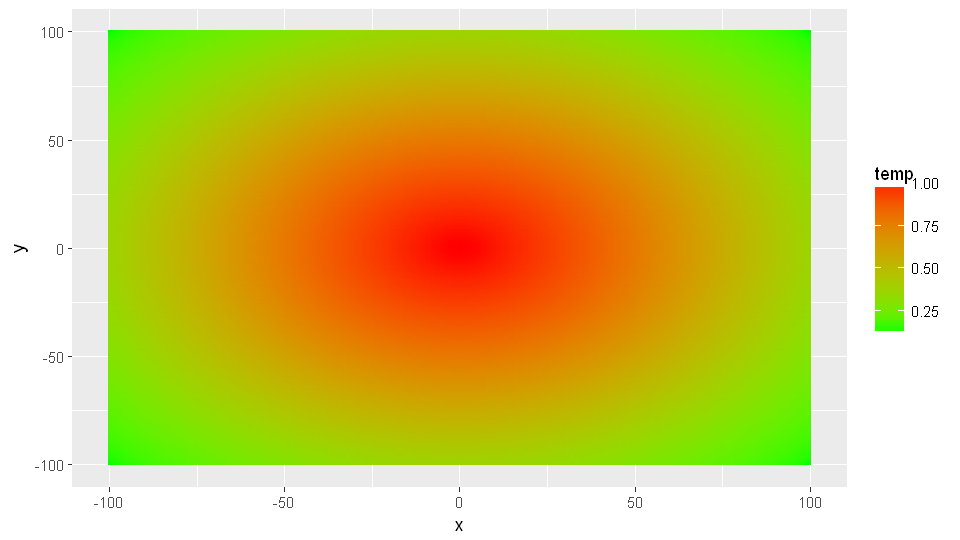

In [319]:
taille <- 100
field <- data.table( x = rep(seq(-taille,taille,1),2*taille+1), y = rep(seq(-taille,taille,1),each = 2*taille+1))
field[,temp := exp(-(x^2 + y^2)/10000)]
p <- ggplot(data = field,aes(x,y)) +
  geom_tile(aes(fill = temp))+
  scale_fill_gradient(low = "green", high = "red")
p

In [321]:
gradx <- field[,.(gradx = c(NA,temp[3:.N],NA)-c(NA,temp[1:(.N-2)],NA), x = x),by = y] #gradient selon x
grady <- field[,.(grady = c(NA,temp[3:.N],NA)-c(NA,temp[1:(.N-2)],NA), y = y),by = x] # gradient selon y
grad <- merge(gradx,grady, by = c("x","y")) # merge des deux

# je prend 10 fleche par lignes, sinon y en a trop. 
gradplot <- grad[x %in% seq(-taille,taille,round(taille/10)) & y %in% seq(-taille,taille,round(taille/10))] 
# je renormalise le gradient pour que la longueur des fleches soit appreciable sur le plot
gradplot[,c("gradx","grady"):= .(gradx/max(gradx,na.rm = T)*10,grady/max(grady,na.rm = T)*10)] 

Warning message:
"Removed 80 rows containing missing values (geom_segment)."

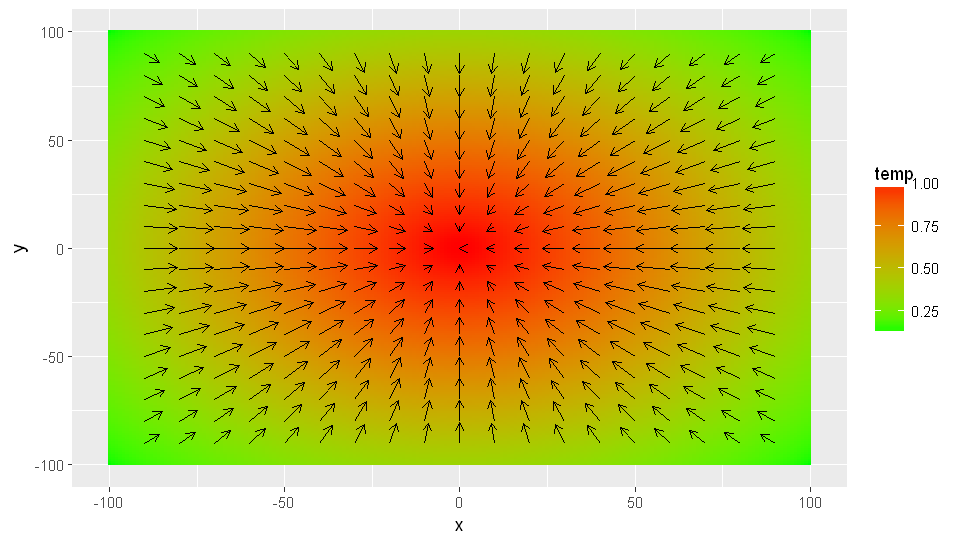

In [322]:
p + geom_segment(data = gradplot,aes(x,y,xend =x+ gradx,yend =  y+grady), arrow = arrow(length = unit(0.2,"cm"))) 